In [1]:
import numpy as np
import pandas as pd
from typing import List

import statsmodels.formula.api as smf

from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

In [2]:
# trick derived from https://stackoverflow.com/a/57832026
def display_sbs(dfs: List) -> None:
    """
    Display tables side by side to save vertical space
    
    Input:
        dfs: List of pandas.DataFrame

    Output:
        None
    """
    output = ""
    for df in dfs:
        output += df.style.set_table_attributes("style='display:inline'")._repr_html_()
        output += 10*"\xa0"
    display(HTML(output))

In [3]:
# dataset from https://www.kaggle.com/blastchar/telco-customer-churn
churn = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
churn.rename(str.lower, axis = 'columns', inplace = True)

churn.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
display(churn.value_counts('totalcharges').head(5))

churn.totalcharges = pd.to_numeric(churn.totalcharges.str.replace(" ",""))

totalcharges
         11
20.2     11
19.75     9
20.05     8
19.9      8
dtype: int64

,seniorcitizen,tenure,monthlycharges,totalcharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


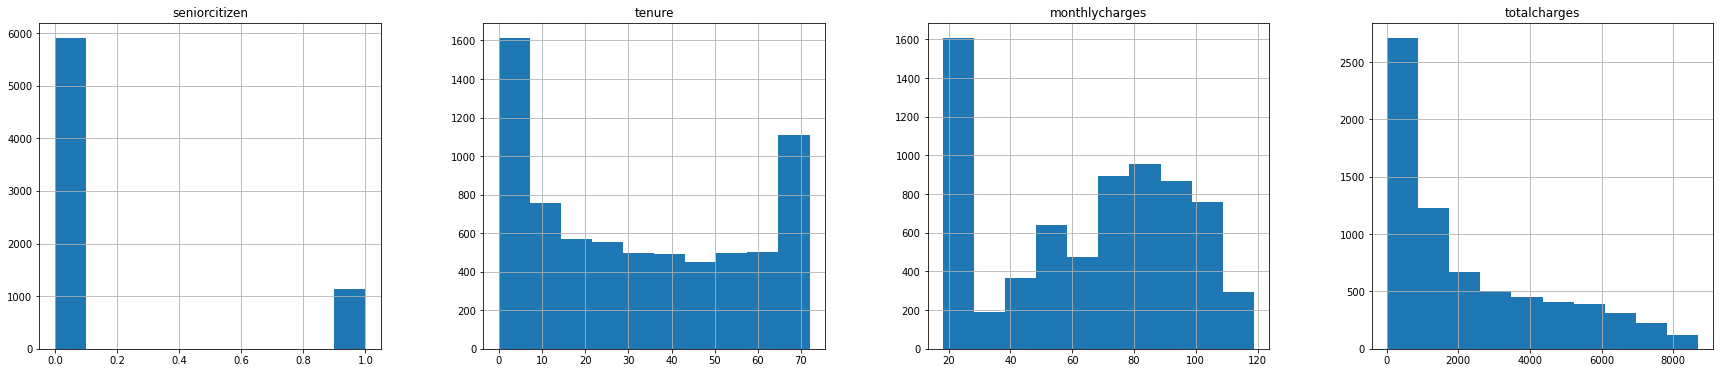

In [5]:
churn.hist(figsize = (30,6), layout = (1,4))

churn.describe()

In [6]:
churn.seniorcitizen = np.where(churn.seniorcitizen == 0, "no", "yes")

In [7]:
cols_cat = (
    churn
    .dtypes
    .where(churn.dtypes == "object")
    .dropna()
    .index
    )

cats = [churn[i].value_counts().to_frame() for i in cols_cat if i != "customerid"]
a = display_sbs(cats)

del(cats)

,gender
Male,3555
Female,3488
,seniorcitizen
no,5901
yes,1142
,partner
No,3641
Yes,3402
,dependents
No,4933


In [8]:
(
    churn
    .isna()
    .apply(sum)
    .sort_values(ascending = False)
    .head(5)
)

totalcharges        11
customerid           0
deviceprotection     0
monthlycharges       0
paymentmethod        0
dtype: int64

In [9]:
churn.loc[churn.totalcharges.isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,no,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,no,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,no,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,no,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,no,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,no,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,no,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,no,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,no,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,no,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
lm = smf.ols("totalcharges ~ monthlycharges:tenure", churn).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalcharges   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.981e+06
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:02:14   Log-Likelihood:                -39571.
No. Observations:                7032   AIC:                         7.915e+04
Df Residuals:                    7030   BIC:                         7.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.9259      1.139     -0.813      0.416      -3.158       1.307
monthlycharges:tenure     1.0005      0.000   2825.026      0.000       1.000       1.001
==============================================================================
Omnibus:                      536.457   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3044.087
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                       6.223   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

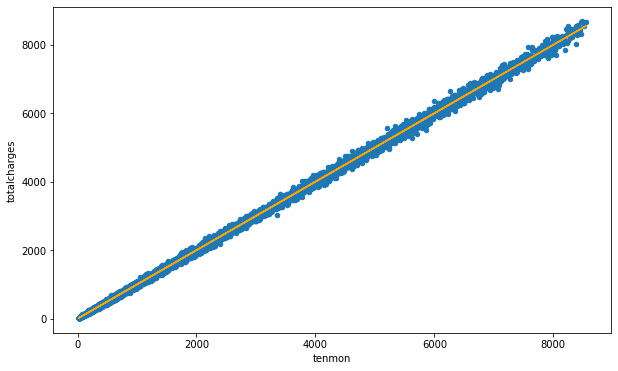

In [11]:
churn_wona = churn.assign(tenmon = churn.monthlycharges * churn.tenure).dropna()
churn_wona.plot("tenmon", "totalcharges", kind = "scatter", figsize = (10,6))
plt.plot(churn_wona.tenmon, lm.fittedvalues, color = 'orange')
plt.show()
del(churn_wona)

In [12]:
churn.fillna(0, inplace = True)
churn.to_csv('data/cleaned.csv', index = False)